In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import File

In [5]:
print(os.getcwd())
os.chdir('./data')

/Users/User/Documents/Python/wrangle


In [7]:
print(os.getcwd())
print(os.listdir())

/Users/User/Documents/Python/wrangle/data
['311-service-requests.csv']


In [14]:
complaints = pd.read_csv('311-service-requests.csv', dtype='unicode')
    # specify dtype to save memory (guess type is memory demanding)
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [15]:
complaints.dtypes

Unique Key                        object
Created Date                      object
Closed Date                       object
Agency                            object
Agency Name                       object
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                      object
Incident Address                  object
Street Name                       object
Cross Street 1                    object
Cross Street 2                    object
Intersection Street 1             object
Intersection Street 2             object
Address Type                      object
City                              object
Landmark                          object
Facility Type                     object
Status                            object
Due Date                          object
Resolution Action Updated Date    object
Community Board                   object
Borough                           object
X Coordinate (St

## Cleaning column names

In [36]:
class clean_name:
    # constructor
    def __init__(self, trim = True, lower_case = True, space_to = '_'):
        self.trim = trim
        self.lower_case = lower_case    
        self.space_to = space_to 
    
    # cleaning process:
    def clean(self, cols):
        clean_cols = []
        for col in cols:
            if self.trim:
                col = self._trim(col)
            if self.lower_case:
                col = self._lower_case(col)
            if self.space_to is not None:
                col = self._space_to(col, self.space_to)
        
            clean_cols.append(col)
        return clean_cols
    
    
    # strip space
    @staticmethod
    def _trim(s):
        return s.strip()
        
    # lower case
    @staticmethod
    def _lower_case(s):
        return s.lower()
    
    # replace space with underscore
    @staticmethod
    def _space_to(s,replacer):
        return s.replace(' ', replacer)
    
col_cleaner = clean_name()

In [19]:
cols = list(complaints.columns)
cols[:5]

['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name']

In [37]:
clean_cols = col_cleaner.clean(cols)
clean_cols

['unique_key',
 'created_date',
 'closed_date',
 'agency',
 'agency_name',
 'complaint_type',
 'descriptor',
 'location_type',
 'incident_zip',
 'incident_address',
 'street_name',
 'cross_street_1',
 'cross_street_2',
 'intersection_street_1',
 'intersection_street_2',
 'address_type',
 'city',
 'landmark',
 'facility_type',
 'status',
 'due_date',
 'resolution_action_updated_date',
 'community_board',
 'borough',
 'x_coordinate_(state_plane)',
 'y_coordinate_(state_plane)',
 'park_facility_name',
 'park_borough',
 'school_name',
 'school_number',
 'school_region',
 'school_code',
 'school_phone_number',
 'school_address',
 'school_city',
 'school_state',
 'school_zip',
 'school_not_found',
 'school_or_citywide_complaint',
 'vehicle_type',
 'taxi_company_borough',
 'taxi_pick_up_location',
 'bridge_highway_name',
 'bridge_highway_direction',
 'road_ramp',
 'bridge_highway_segment',
 'garage_lot_name',
 'ferry_direction',
 'ferry_terminal_name',
 'latitude',
 'longitude',
 'location']

In [38]:
complaints.columns = clean_cols
complaints.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,garage_lot_name,ferry_direction,ferry_terminal_name,latitude,longitude,location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


## Most common type of complaints

In [44]:
comp_counts = complaints['complaint_type'].value_counts()
comp_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: complaint_type, dtype: int64

<AxesSubplot:>

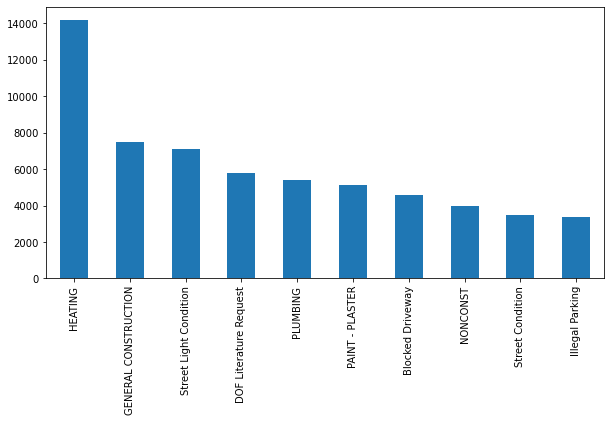

In [53]:
comp_counts[:10].plot(kind='bar',figsize=(10,5))

HEATING issue is complaint the most with 14200 times

## Noise complaint

In [58]:
unique_comp = complaints['complaint_type'].unique()

In [55]:
import re

In [61]:
# find unique noise complaint
vmatch = np.vectorize(lambda x:bool(re.search('Noise', x, re.IGNORECASE)))
is_noise = vmatch(unique_comp)

noise_comp = unique_comp[is_noise]
noise_comp

array(['Noise - Street/Sidewalk', 'Noise - Commercial', 'Noise - Vehicle',
       'Noise - House of Worship', 'Noise - Park', 'Noise',
       'Noise - Helicopter', 'Collection Truck Noise'], dtype=object)

In [62]:
# find complaint_type that is in the noise_comp list 
is_noise_complaint = np.isin(complaints['complaint_type'], noise_comp)
is_noise_complaint

array([ True, False,  True, ...,  True,  True, False])

In [63]:
# extract all rows with noise complaint
complaints.loc[is_noise_complaint, :].head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,garage_lot_name,ferry_direction,ferry_terminal_name,latitude,longitude,location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7499893014072,-73.88198770727831,"(40.7499893014072, -73.88198770727831)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.67181584567338,-73.84309181950769,"(40.67181584567338, -73.84309181950769)"


## Noise complaints in a specific place

In [64]:
in_brooklyn = complaints['borough'] == 'BROOKLYN'
noise_in_brooklyn = in_brooklyn & is_noise_complaint

complaints[noise_in_brooklyn].head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,garage_lot_name,ferry_direction,ferry_terminal_name,latitude,longitude,location
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225,835 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.66820406598287,-73.95064760056546,"(40.66820406598287, -73.95064760056546)"
10,26595176,10/31/2013 01:25:12 AM,NaN,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11218,3775 18 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63437840816299,-73.96946177104543,"(40.63437840816299, -73.96946177104543)"
20,26592932,10/31/2013 12:43:47 AM,10/31/2013 12:56:20 AM,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11216,778 PARK PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.67350473678714,-73.95184414979961,"(40.67350473678714, -73.95184414979961)"
23,26592304,10/31/2013 12:38:00 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11216,371 TOMPKINS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6849442562592,-73.94422078036632,"(40.6849442562592, -73.94422078036632)"
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634103775951736,-73.91105541883589,"(40.634103775951736, -73.91105541883589)"


In [65]:
# subset of columns
cols_to_select = ['complaint_type', 'borough', 'created_date', 'descriptor']

complaints[noise_in_brooklyn][cols_to_select]

,complaint_type,borough,created_date,descriptor
9,Noise - Commercial,BROOKLYN,10/31/2013 01:34:41 AM,Loud Music/Party
10,Noise - House of Worship,BROOKLYN,10/31/2013 01:25:12 AM,Loud Music/Party
20,Noise - House of Worship,BROOKLYN,10/31/2013 12:43:47 AM,Loud Music/Party
23,Noise - Commercial,BROOKLYN,10/31/2013 12:38:00 AM,Loud Music/Party
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
...,...,...,...,...
111049,Noise - Commercial,BROOKLYN,10/04/2013 12:12:07 AM,Loud Music/Party
111054,Noise - Street/Sidewalk,BROOKLYN,10/04/2013 12:06:39 AM,Loud Talking
111055,Noise - Commercial,BROOKLYN,10/04/2013 12:06:28 AM,Loud Talking
111058,Noise - Commercial,BROOKLYN,10/04/2013 12:05:12 AM,Loud Music/Party


## Which borough has the most noise? 

In [70]:
# select rows in is_noise_complaint and its columns
noise_count_borough = complaints.loc[is_noise_complaint, 'borough'].value_counts()
noise_count_borough.name = 'borough_counts'
noise_count_borough

MANHATTAN        4337
BROOKLYN         2344
QUEENS           1277
BRONX             719
STATEN ISLAND     258
Unspecified         7
Name: borough_counts, dtype: int64

### Bar chart (Frequency)

<AxesSubplot:>

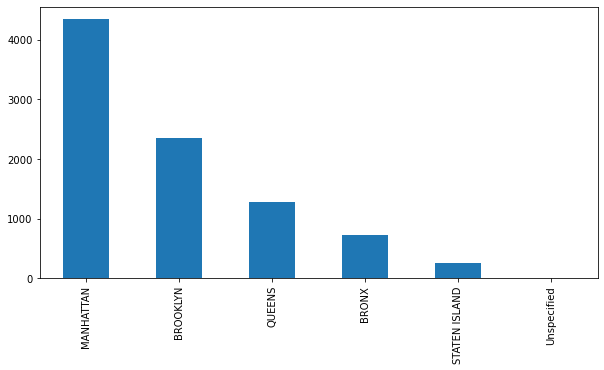

In [74]:
noise_count_borough.plot(kind='bar',figsize = (10,5))

### Bar chart (Percentage)

In [94]:
noise_percent_borough = noise_count_borough/complaints['borough'].value_counts()
noise_percent_borough.name = 'borough_percentage'
noise_percent_borough

BRONX            0.036523
BROOKLYN         0.071268
MANHATTAN        0.178566
QUEENS           0.057313
STATEN ISLAND    0.053560
Unspecified      0.000985
Name: borough_percentage, dtype: float64

<AxesSubplot:>

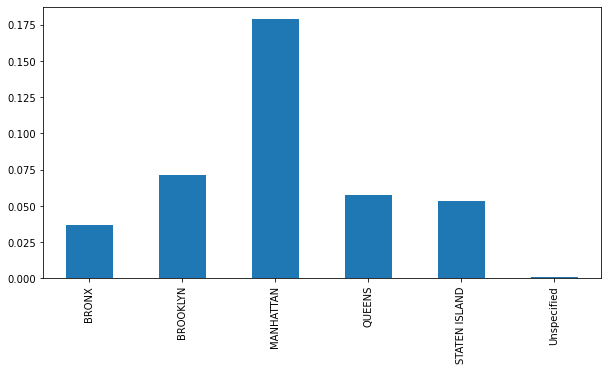

In [95]:
noise_percent_borough.plot(kind='bar', figsize=(10,5))

### Two graphs combined

<AxesSubplot:>

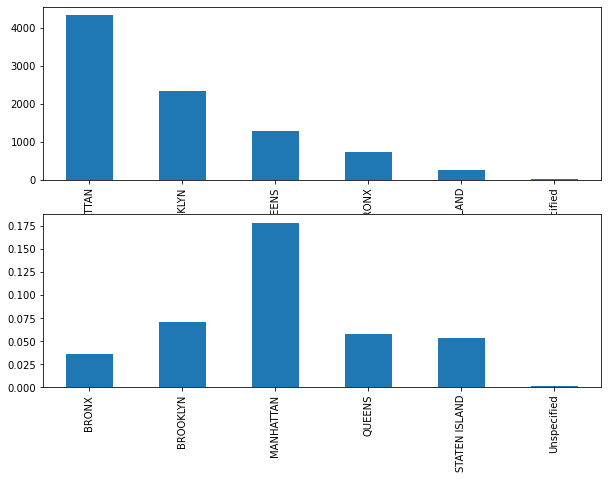

In [96]:
fig, ax = plt.subplots(2,1 ,figsize = (10,7))

noise_count_borough.plot(kind='bar', ax=ax[0])
noise_percent_borough.plot(kind='bar', ax=ax[1])

### Create a table

In [102]:
borough_noise_table = pd.concat([noise_count_borough, noise_percent_borough],axis =1).reset_index()
borough_noise_table.rename(columns={'index': 'borough'}, inplace=True)
borough_noise_table

,borough,borough_counts,borough_percentage
0,MANHATTAN,4337,0.178566
1,BROOKLYN,2344,0.071268
2,QUEENS,1277,0.057313
3,BRONX,719,0.036523
4,STATEN ISLAND,258,0.053560
5,Unspecified,7,0.000985


### Two graphs combined with labels

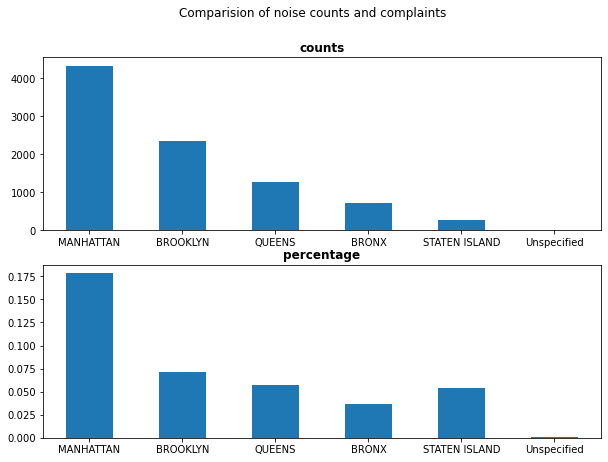

In [104]:
fig, axn = plt.subplots(2,1 ,figsize = (10,7))

borough_noise_table['borough_counts'].plot(kind='bar', ax=axn[0])
borough_noise_table['borough_percentage'].plot(kind='bar', ax=axn[1])

for ax, col in zip(axn, ['counts', 'percentage']):
    colname = f'borough_{col}' # name set for each graph
    borough_noise_table[colname].plot(kind='bar', ax=ax)
    ax.set_xticklabels(borough_noise_table['borough'], rotation=360)
    ax.set_title(col, fontdict=dict(weight='bold'))
    

fig.suptitle('Comparision of noise counts and complaints', fontdict=dict(weight='bold', size=40));